In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.dropna(inplace=True)

### EDA

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


<Axes: ylabel='count'>

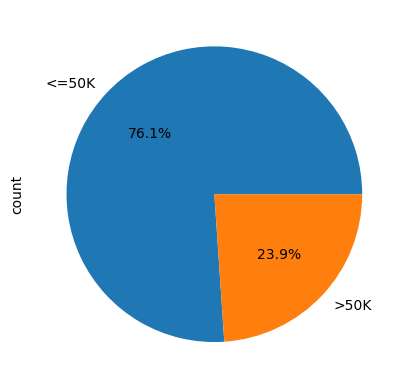

In [5]:
print(data['income'].value_counts())
data['income'].value_counts().plot.pie(autopct= '%1.1f%%')

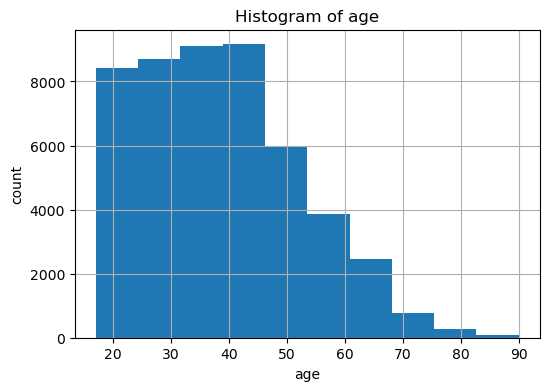

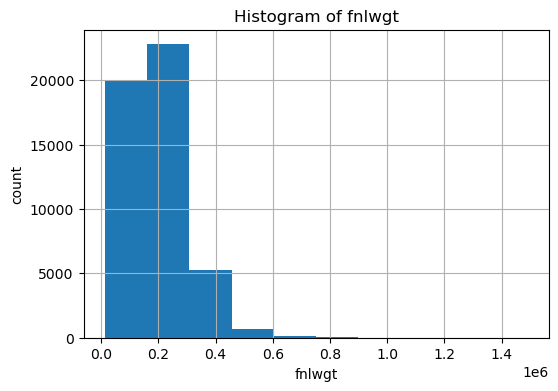

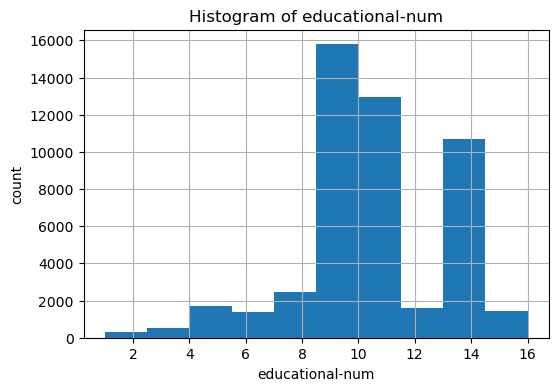

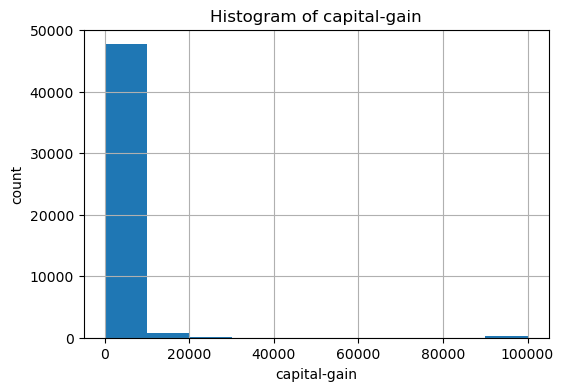

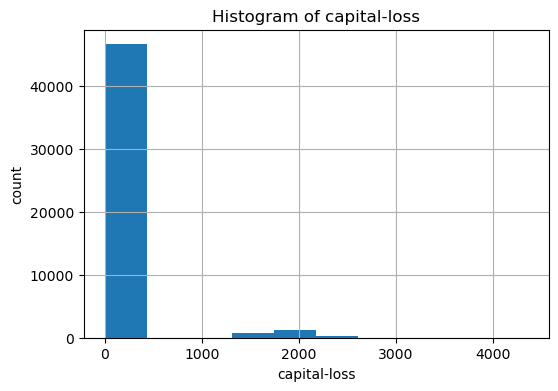

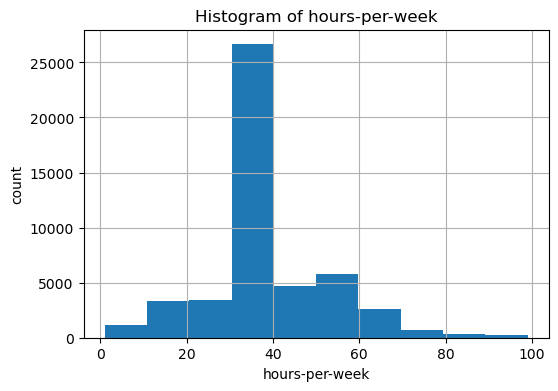

In [6]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure()
    data[column].hist(figsize=(6,4))
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

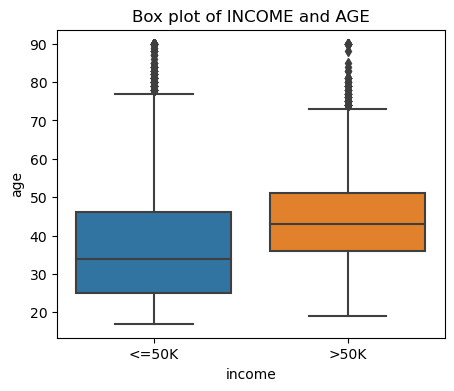

In [7]:
plt.figure(figsize=(5,4))
sns.boxplot(x='income',y='age',data=data).set_title('Box plot of INCOME and AGE')

Text(0.5, 1.0, 'workclass vs count')

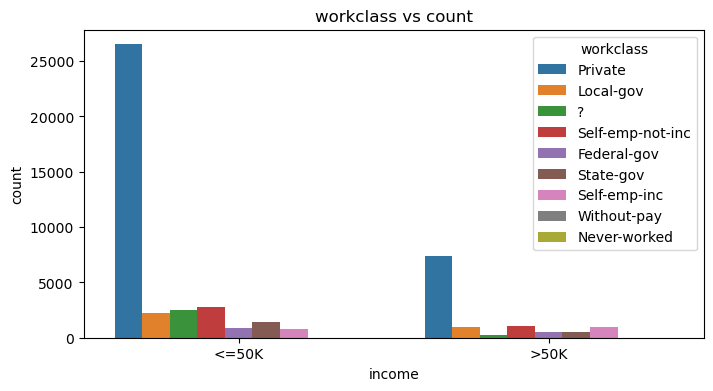

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x='income',hue ='workclass',data=data).set_title("workclass vs count")

<Axes: ylabel='count'>

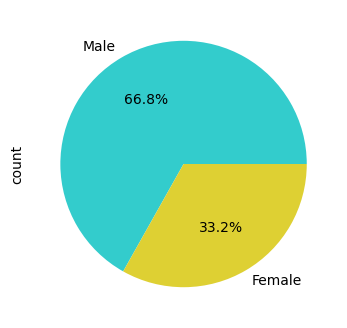

In [9]:
plt.figure(figsize=(10,4))
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])

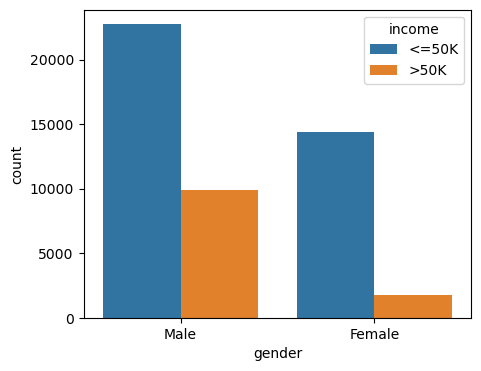

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender", hue="income",data=data);

C:\Users\pc-touch2023\AppData\Local\Temp\ipykernel_9448\3098245395.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], bins=20)


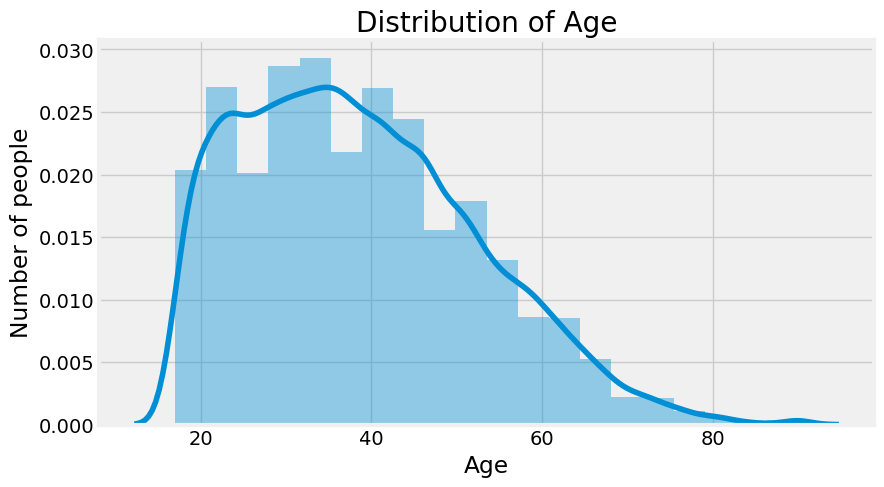

In [11]:
age = data['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

<Axes: title={'center': 'Density plot for Age'}, ylabel='Density'>

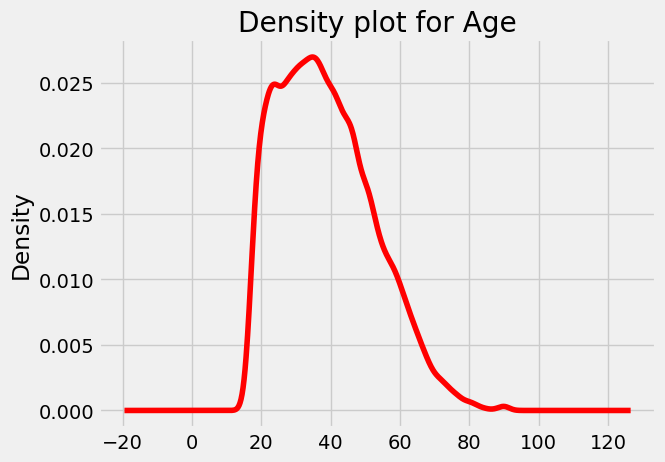

In [12]:
data['age'].plot(kind='kde', title='Density plot for Age', color='r')

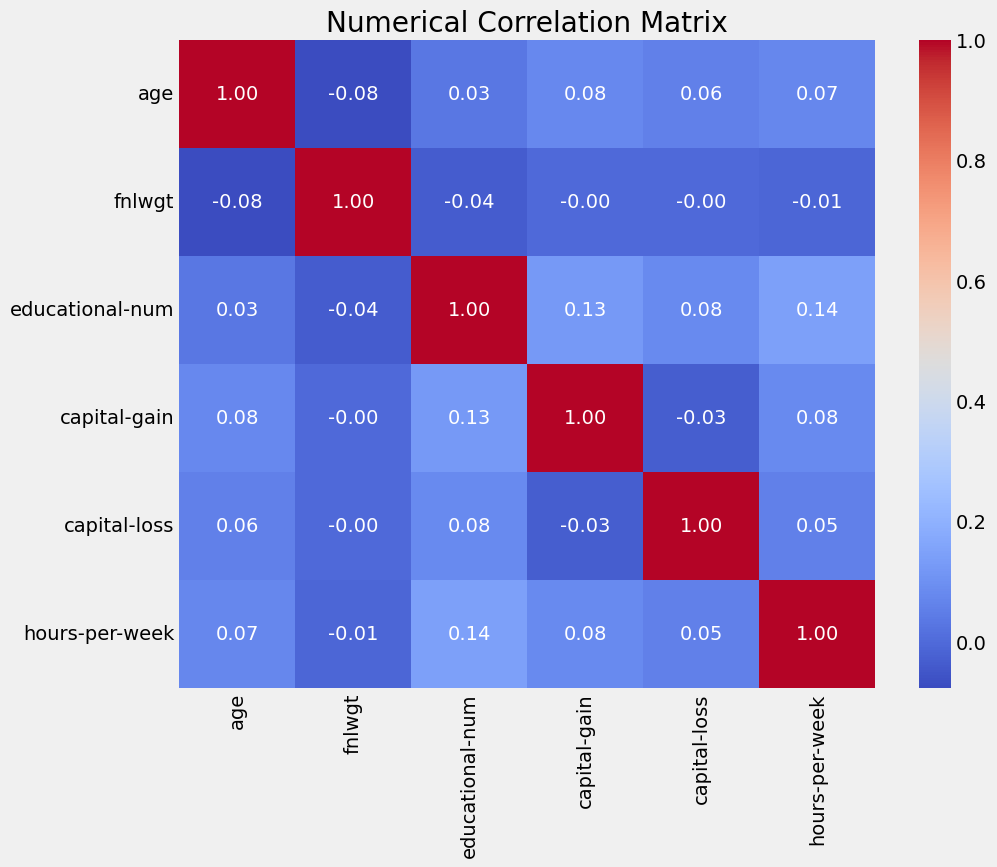

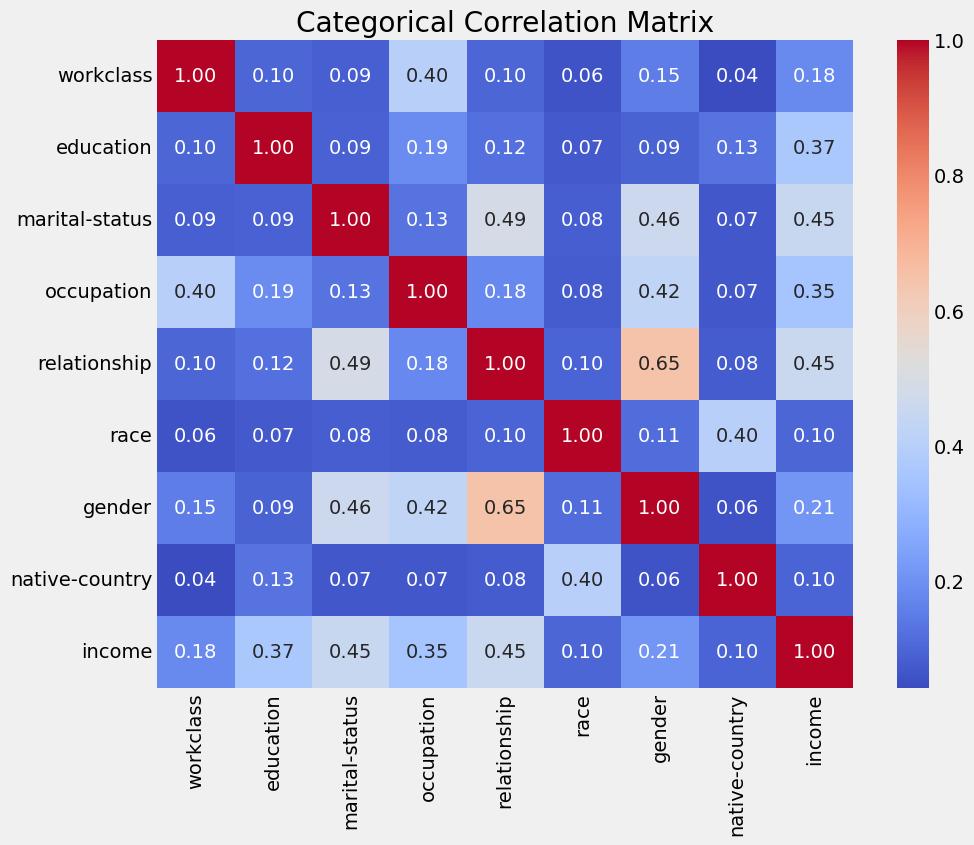

In [13]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Assuming `Data` is your DataFrame
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Compute Pearson's correlation for numerical columns
numerical_corr = data[numerical_columns].corr()

# Initialize an empty DataFrame for Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create a heatmap for numerical correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Correlation Matrix')
plt.show()

# Create a heatmap for Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Categorical Correlation Matrix')
plt.show()